## Plotando campos escalares e vetoriais

In [1]:
import numpy as np
import matplotlib.pyplot as plt

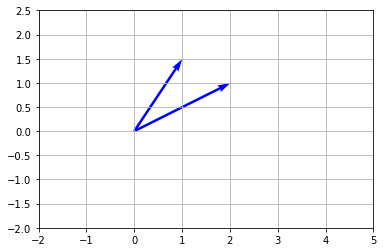

In [2]:
# VOrigem dos vetores
X = [0] 
Y = [0] 
  
#  
u1 = [2]   
v1 = [1]

u2 = [1]
v2 = [1.5]

curl = []
  
# plot
plt.quiver(X, Y, u1, v1, color='b', units='xy', scale=1) 
plt.quiver(X, Y, u2, v2, color='b', units='xy', scale=1) 
#plt.title('Single Vector') 
  
# x-lim e y-lim 
plt.xlim(-2, 5) 
plt.ylim(-2, 2.5) 
  
plt.grid() 
plt.show() 

## Campos escalares 2D

Vamos considerar o campo escalar 2D definido por:

$$ h(x,y) = \frac{h_0}{1+ \frac{x^2+y^2}{R^2}}$$

In [3]:
h0=2277
R = 4

x = y = np.linspace(-10., 10., 41)
xv, yv = np.meshgrid(x, y, indexing='ij', sparse=False)

hv = h0/(1 + (xv**2+yv**2)/(R**2))

(-10.0, 10.0, -10.0, 10.0)

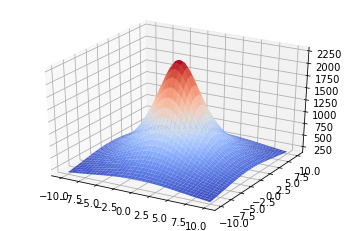

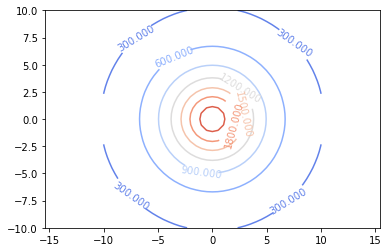

In [4]:
# Simple plot of mountain and parametric curve
fig = plt.figure(1)
ax = fig.gca(projection='3d')
from matplotlib import cm
ax.plot_surface(xv, yv, hv, cmap=cm.coolwarm,
                rstride=1, cstride=1)

# Add labels with the contour level for each contour line
fig = plt.figure(2)
ax = fig.gca()
cs = ax.contour(xv, yv, hv,cmap=cm.coolwarm)
plt.clabel(cs)
plt.axis('equal')

## Gradiente

Dada um campo escalar 2D $h(x,y)$, o gradiente de $h$ é dado por

$$ \mathbf {grad} \space h= \mathbf{\nabla} \space h = \left ( \frac{\partial h_x}{\partial x}, \frac{\partial h_y}{\partial y}, \frac{\partial h_z}{\partial z} \right )$$

In [5]:
x2 = y2 = np.linspace(-10.,10.,11)
x2v, y2v = np.meshgrid(x2, y2, indexing='ij', sparse=False)
h2v = h0/(1 + (x2v**2 + y2v**2)/(R**2)) # h on coarse grid

dhdx, dhdy = np.gradient(h2v)

(-10.0, 10.0, -10.0, 10.0)

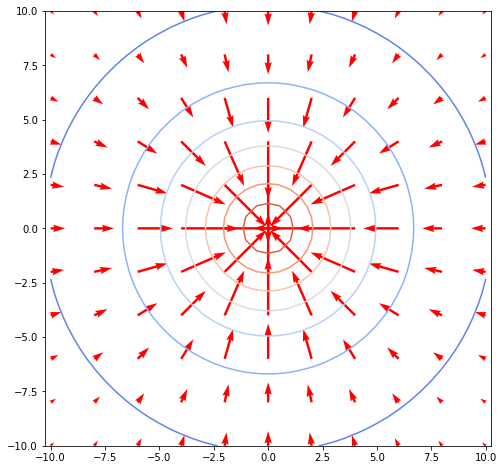

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.quiver(x2v, y2v, dhdx, dhdy, color='r',
          angles='xy', scale_units='xy')
ax.contour(xv, yv, hv,cmap=cm.coolwarm)
plt.axis('equal')

Vamos considerar agora o seguinte campo escalar 2D:

$$ f(x,y) = x e^{-(x^2+y^2)} $$

In [7]:
x3 = y3= np.linspace(-2.,2.)
x3v, y3v = np.meshgrid(x3, y3, indexing='ij', sparse=False)
fv = x3v * np.exp(-(x3v**2 + y3v**2))

dhdx, dhdy = np.gradient(fv)

(-2.0, 2.0, -2.0, 2.0)

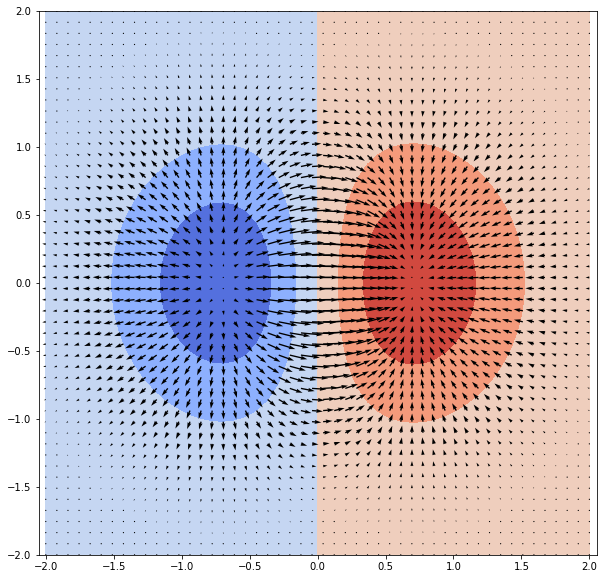

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.contourf(x3v, y3v, fv,cmap=cm.coolwarm)
ax.quiver(x3v, y3v, dhdx, dhdy, color='k')
plt.axis('equal')

## Campos vetoriais

Vamos considerar os seguintes campos vetoriais:

$$ \mathbf F_1(x,y) = - \mathbf i − \mathbf j $$


$$ \mathbf F_2(x,y) =\mathbf i + \mathbf j $$

In [9]:
def f1(x,y):
    assert x.shape==y.shape, 'x and y must have same shape'

    u = -x
    v = -y
    
    return u, v

In [10]:
def f2(x,y):
    assert x.shape==y.shape, 'x and y must have same shape'

    u = x
    v = y
    
    return u, v

In [11]:
def derivatives(f,x,y,delta=1e-3):
    assert x.shape==y.shape, 'x and y must have same shape'
    
    u_plus_x, v_plus_x = f(x+delta,y) 
    u_minus_x, v_minus_x = f(x-delta,y)
    
    u_plus_y, v_plus_y = f(x,y+delta) 
    u_minus_y, v_minus_y = f(x,y-delta)

    dudx = (u_plus_x-u_minus_x)/(2*delta)
    dudy = (u_plus_y-u_minus_y)/(2*delta)
    dvdx = (v_plus_x-v_minus_x)/(2*delta)
    dvdy = (v_plus_y-v_minus_y)/(2*delta)
    
    return dudx, dudy, dvdx, dvdy

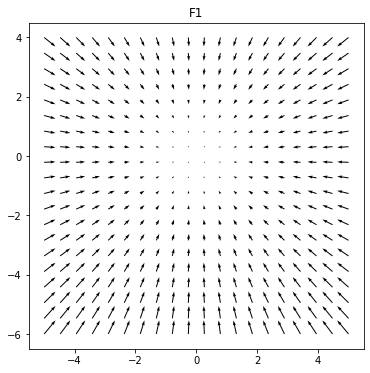

In [33]:
x,y = np.meshgrid(np.linspace(-5,5,20),
                  np.linspace(-6,4,20))
u,v = f1(x,y)
dudx, dudy, dvdx, dvdy = derivatives(f1,x,y,delta=1)

plt.figure(figsize=(6,6))
plt.title('F1')
plt.quiver(x,y,u,v)


### Divergente e rotacional

Seja $\mathbf F(x,y,z)$ um campo vetorial, o divergente de $\mathbf F$ é dado por:

$$ \nabla \centerdot \mathbf F = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}$$

O rotacional é dado por

$$
\nabla \times \mathbf {F} =
\begin{vmatrix}
i & 
j &
k \\
\frac{\partial}{\partial x} & 
\frac{\partial}{\partial y} &
\frac{\partial}{\partial z} \\
F_x &
F_y &
F_z
\end{vmatrix}
$$


$$
\nabla \times \mathbf {F} = \frac{\partial F_z}{\partial y} - \frac{\partial F_y}{\partial z} \mathbf i + \frac{\partial F_x}{\partial z} - \frac{\partial F_z}{\partial x} \mathbf j + \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \mathbf k
$$

In [34]:
div = dudx + dvdy
curl = dvdx - dudy

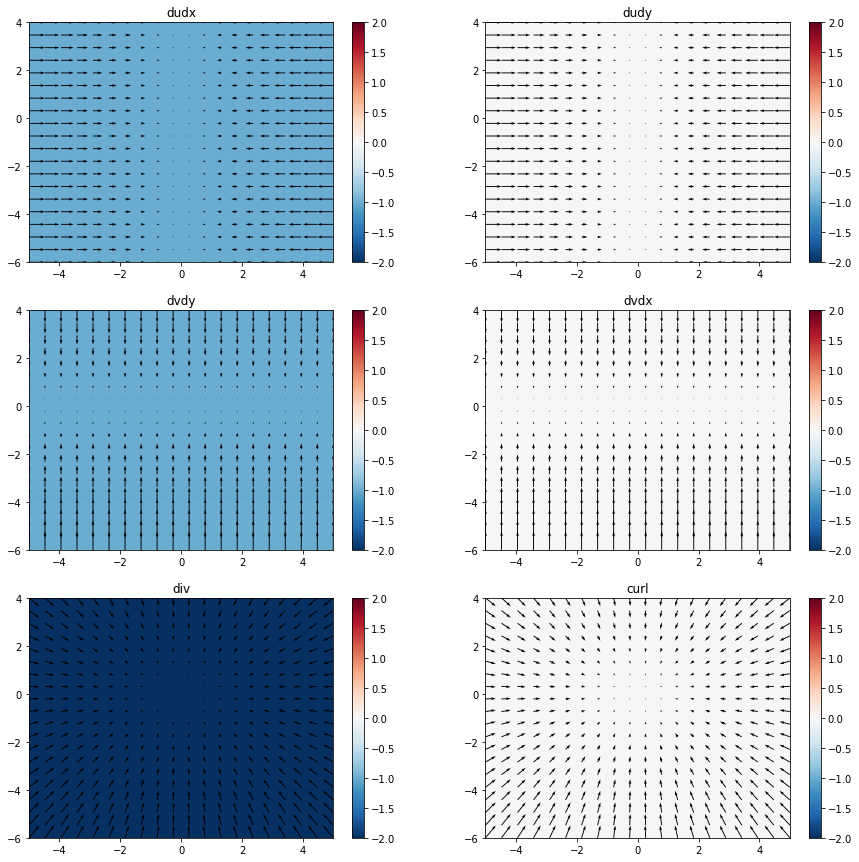

In [35]:

plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('dudx')
plt.pcolor(x, y, dudx,cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,2)
plt.title('dudy')
plt.pcolor(x, y, dudy,cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,3)
plt.title('dvdy')
plt.pcolor(x, y, dvdy,cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,4)
plt.title('dvdx')
plt.pcolor(x, y, dvdx,cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,5)
plt.title('div')
plt.pcolor(x, y, div,cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.subplot(3,2,6)
plt.title('curl')
plt.pcolor(x, y, curl,cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.show()

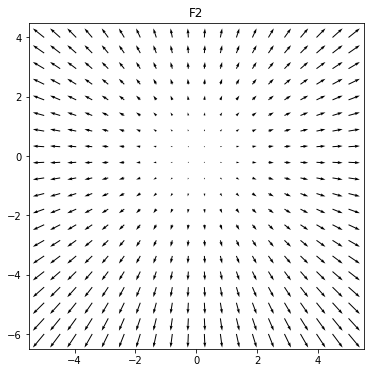

In [39]:
x,y = np.meshgrid(np.linspace(-5,5,20),
                  np.linspace(-6,4,20))

u,v = f2(x,y)
dudx, dudy, dvdx, dvdy = derivatives(f2,x,y,delta=1)
div = dudx + dvdy
curl = dvdx - dudy

plt.figure(figsize=(6,6))
plt.title('F2')
plt.quiver(x,y,u,v)


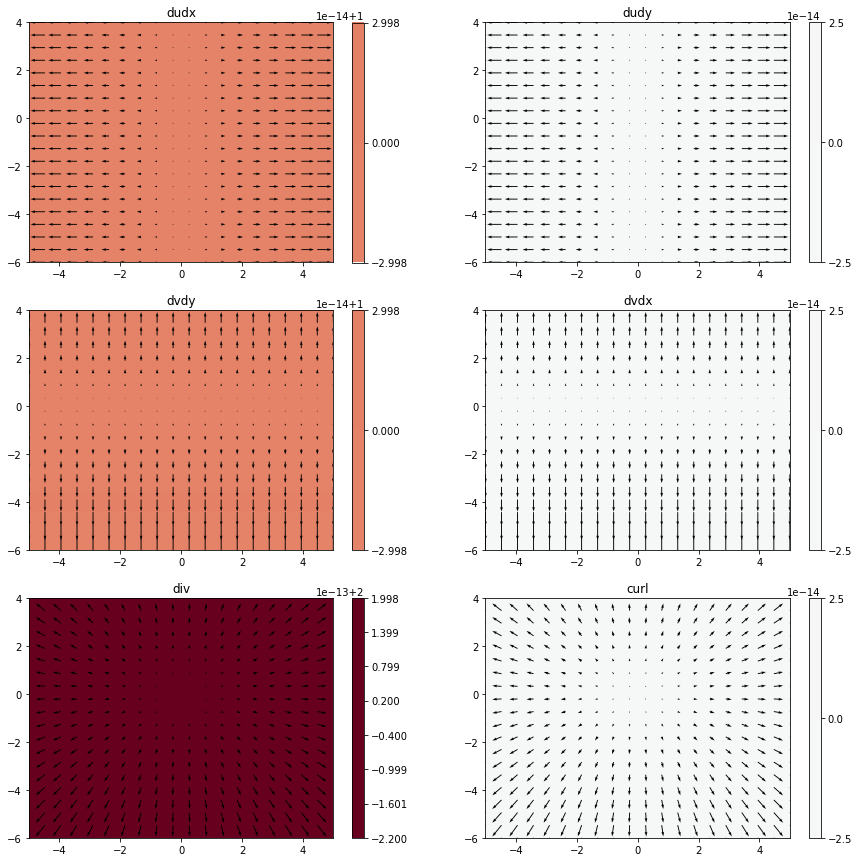

In [40]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('dudx')
plt.contourf(x, y, dudx, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,2)
plt.title('dudy')
plt.contourf(x, y, dudy, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,3)
plt.title('dvdy')
plt.contourf(x, y, dvdy, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,4)
plt.title('dvdx')
plt.contourf(x, y, dvdx, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,5)
plt.title('div')
plt.contourf(x, y, div, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.subplot(3,2,6)
plt.title('curl')
plt.contourf(x, y, curl, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.show()

Agora vamos considerar os seguintes campos vetoriais:

$$ \mathbf F_3(x,y) = y \mathbf i + x \mathbf j $$

$$ \mathbf F_4(x,y) = y \mathbf i - x \mathbf j $$

In [41]:
def f3(x,y):
    assert x.shape==y.shape, 'x and y must have same shape'

    u = y
    v = x
    
    return u, v

In [42]:
def f4(x,y):
    assert x.shape==y.shape, 'x and y must have same shape'

    u = y
    v = -x
    
    return u, v

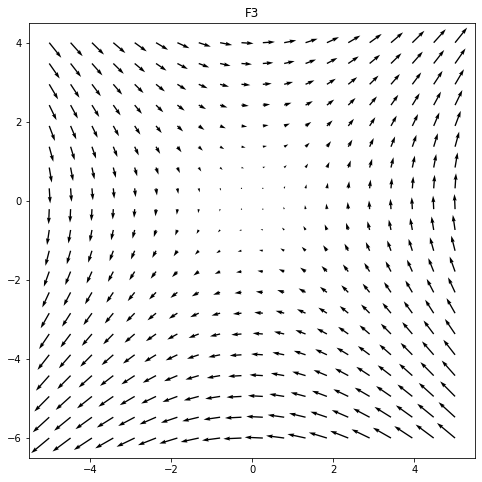

In [43]:
x,y = np.meshgrid(np.linspace(-5,5,20),
                  np.linspace(-6,4,20))

u,v = f3(x,y)
dudx, dudy, dvdx, dvdy = derivatives(f3,x,y,delta=1)
div = dudx + dvdy
curl = dvdx - dudy

plt.figure(figsize=(8,8))
plt.title('F3')
plt.quiver(x,y,u,v)

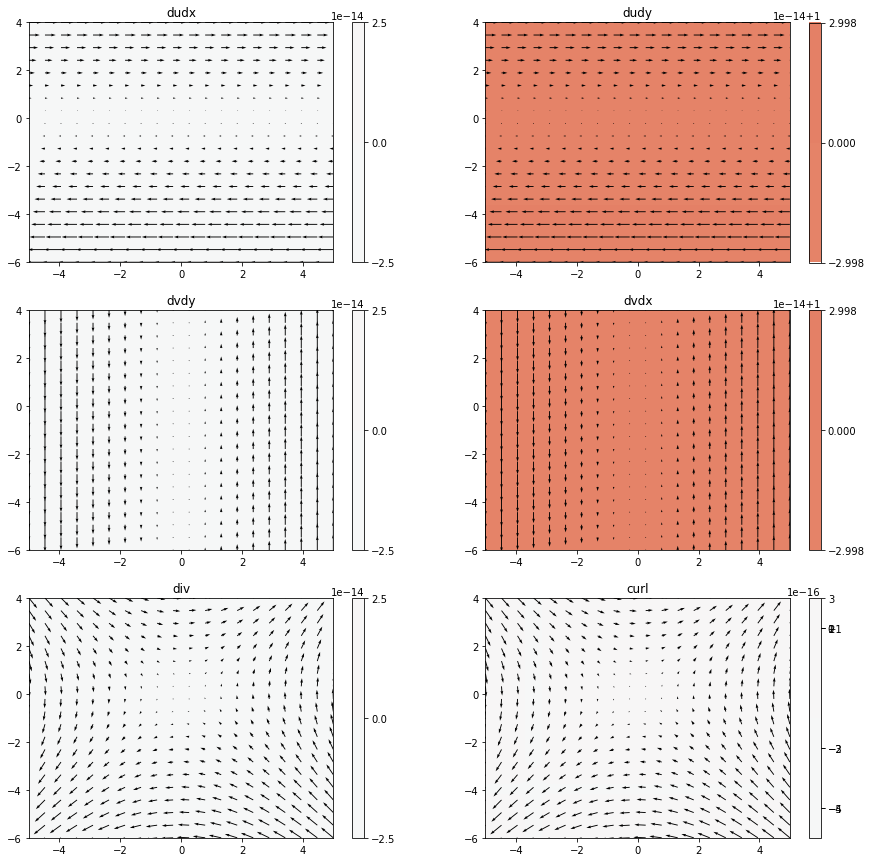

In [45]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('dudx')
plt.contourf(x, y, dudx, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,2)
plt.title('dudy')
plt.contourf(x, y, dudy, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,3)
plt.title('dvdy')
plt.contourf(x, y, dvdy, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,4)
plt.title('dvdx')
plt.contourf(x, y, dvdx,cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,5)
plt.title('div')
plt.contourf(x, y, div, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.subplot(3,2,6)
plt.title('curl')
plt.contourf(x, y, curl, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.show()

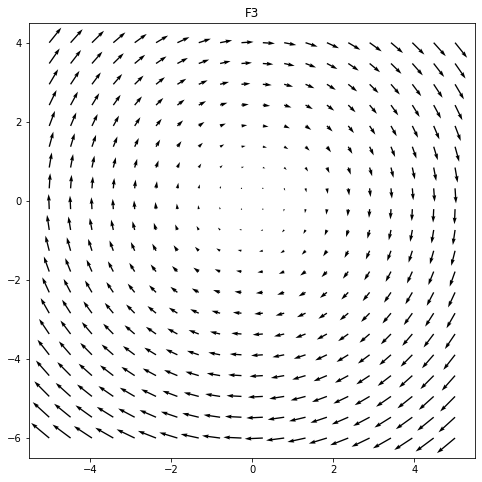

In [46]:
x,y = np.meshgrid(np.linspace(-5,5,20),
                  np.linspace(-6,4,20))

u,v = f4(x,y)
dudx, dudy, dvdx, dvdy = derivatives(f4,x,y,delta=1)
div = dudx + dvdy
curl = dvdx - dudy

plt.figure(figsize=(8,8))
plt.title('F3')
plt.quiver(x,y,u,v)


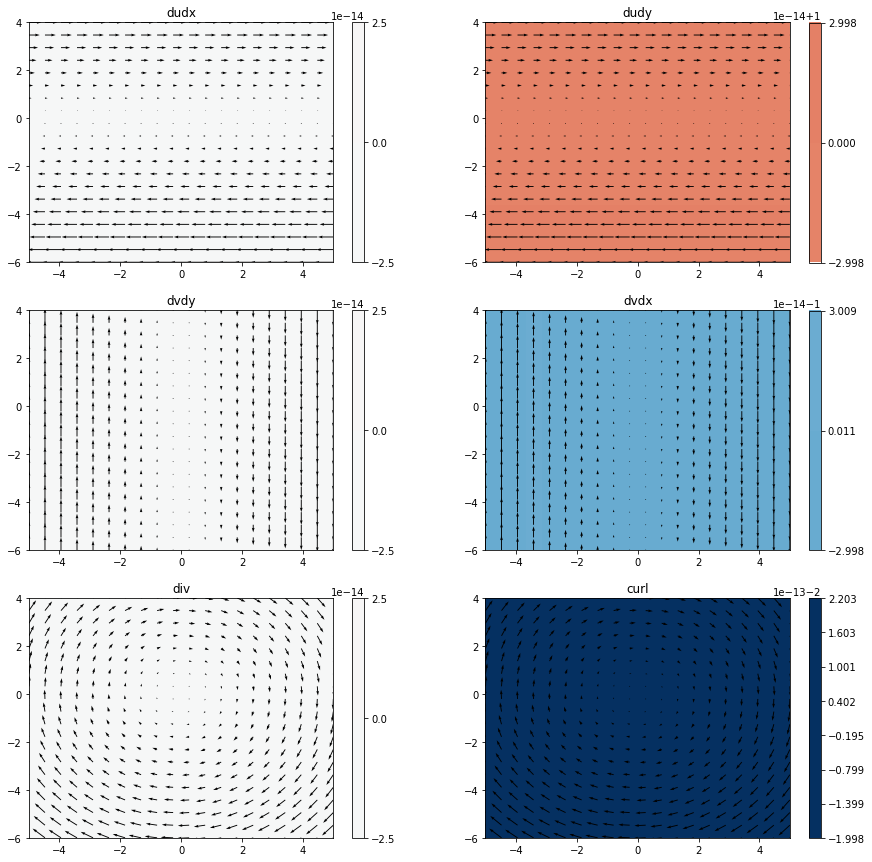

In [47]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.title('dudx')
plt.contourf(x, y, dudx, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,2)
plt.title('dudy')
plt.contourf(x, y, dudy, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,0)

plt.subplot(3,2,3)
plt.title('dvdy')
plt.contourf(x, y, dvdy, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,4)
plt.title('dvdx')
plt.contourf(x, y, dvdx, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,0,v)

plt.subplot(3,2,5)
plt.title('div')
plt.contourf(x, y, div, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.subplot(3,2,6)
plt.title('curl')
plt.contourf(x, y, curl, cmap='RdBu_r',vmin=-2,vmax=2)
plt.colorbar()
plt.quiver(x,y,u,v)

plt.show()